In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
data = pd.read_csv("titanic.csv")

In [109]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
#Exploratory Data Analysis

In [111]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

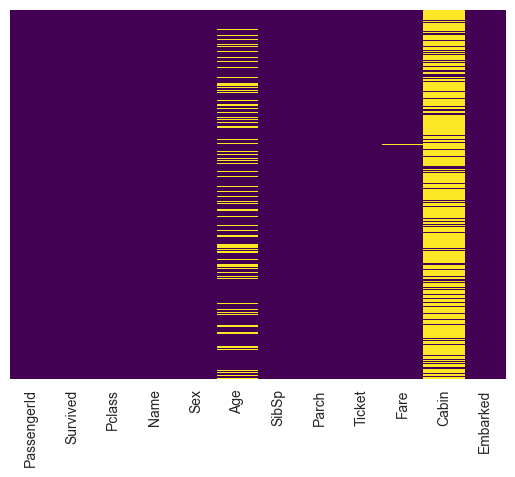

In [112]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [113]:
# Roughly there are mainly two columns of data is missing which we will dealt in future 

<Axes: xlabel='Survived', ylabel='count'>

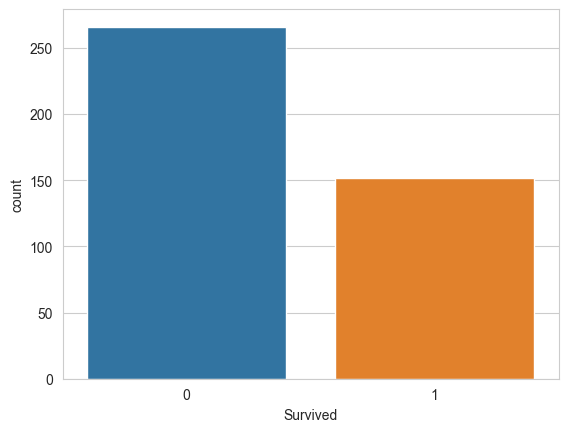

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

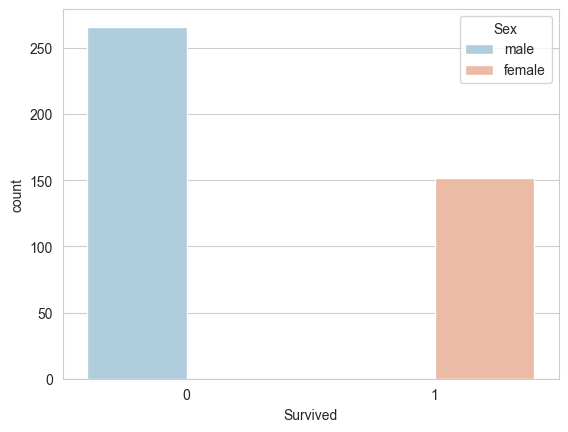

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

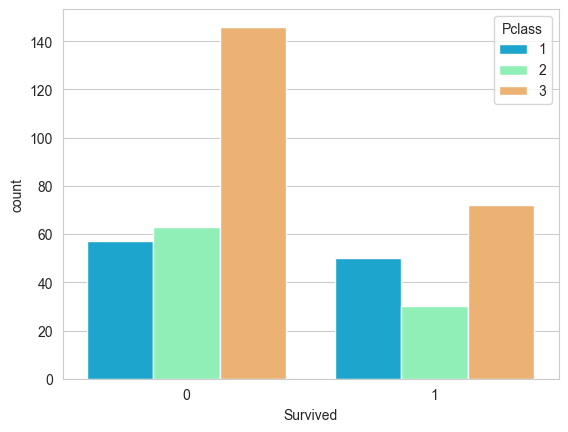

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

C:\Users\USER\AppData\Local\Temp\ipykernel_6964\1815040603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].dropna(),kde=False,color='darkred', bins=40)


<Axes: xlabel='Age'>

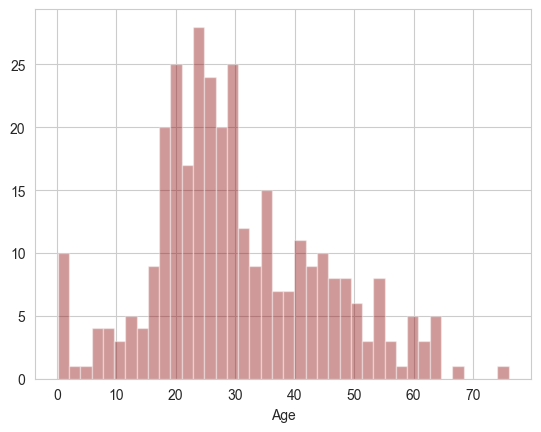

In [117]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred', bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

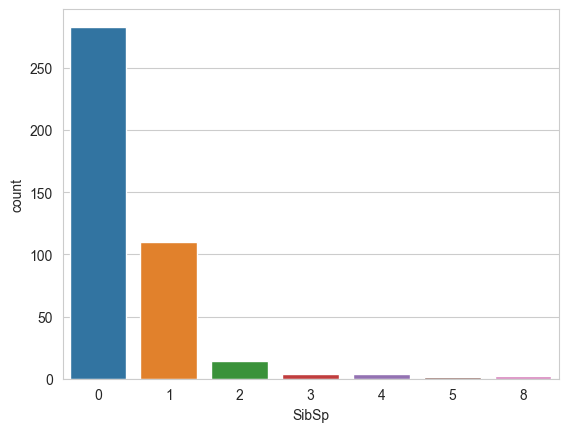

In [118]:
sns.countplot(x='SibSp',data=data)

<Axes: >

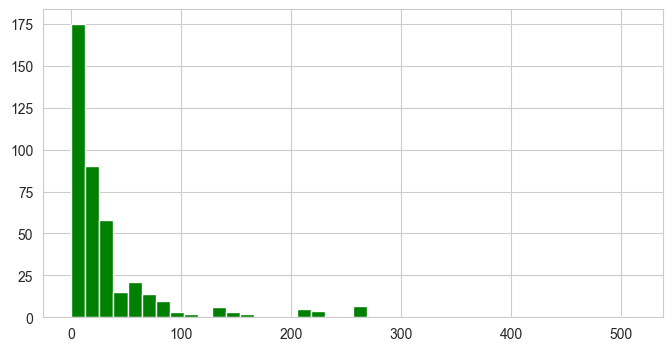

In [119]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [120]:
data.shape

(418, 12)

<Axes: xlabel='Pclass', ylabel='Age'>

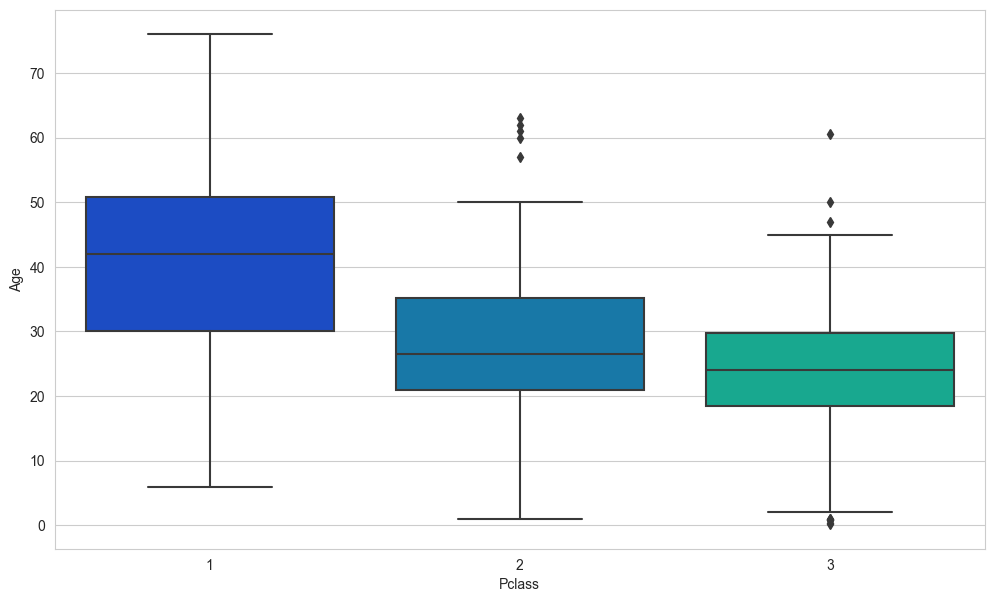

In [121]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [122]:
def computeAge(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age 
        
    

In [123]:
data['Age']=data[['Age','Pclass']].apply(computeAge,axis=1)

<Axes: >

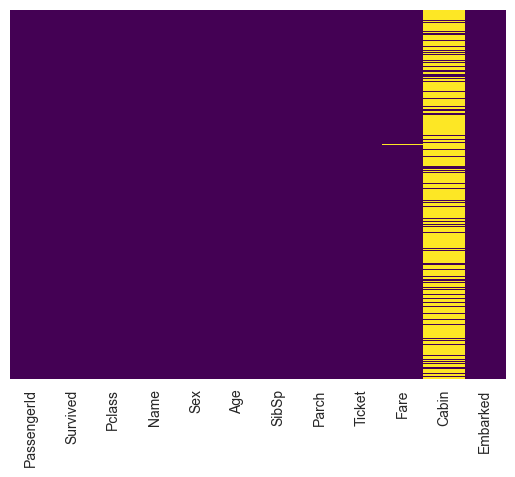

In [124]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [125]:
data.drop('Cabin',axis=1,inplace=True)

<Axes: >

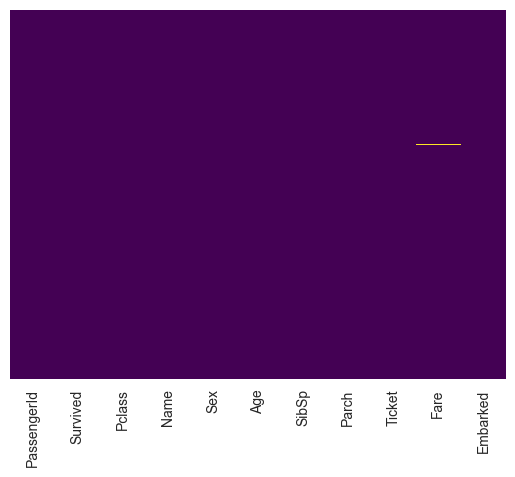

In [126]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [127]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [128]:
data.shape

(418, 11)

In [129]:
data.dropna(subset=['Fare'], axis=0, inplace=True)

<Axes: >

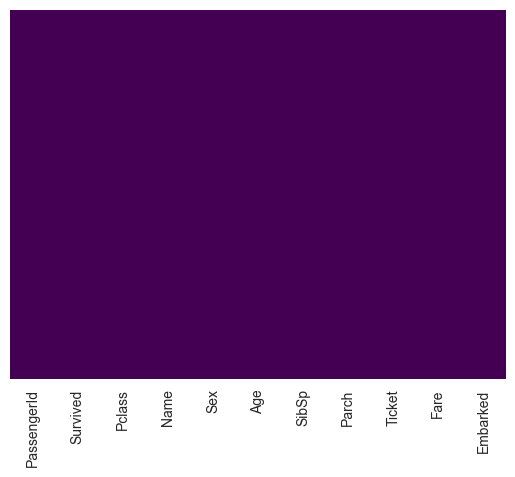

In [130]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [132]:
#coverting categorical values into dummy values

In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [134]:
embark=pd.get_dummies(data['Embarked'],drop_first=True).head()
embark.head()

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


In [135]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [136]:
sex.head()

,male
0,True
1,False
2,True
3,True
4,False


In [137]:
data.drop(['Name','Ticket','Embarked','Sex'],axis=1,inplace=True)

In [138]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [139]:
data=pd.concat([data,sex,embark],axis=1)

In [140]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [141]:
#implementing the logistics regression

In [142]:
data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [143]:
data['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [144]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
male             0
Q              412
S              412
dtype: int64

In [145]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
data.drop(['Q','S'],axis=1,inplace=True)

In [148]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,892,0,3,34.5,0,0,7.8292,True
1,893,1,3,47.0,1,0,7.0000,False
2,894,0,2,62.0,0,0,9.6875,True
3,895,0,3,27.0,0,0,8.6625,True
4,896,1,3,22.0,1,1,12.2875,False


In [149]:
X_train, X_test,y_train,y_test=train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.30,random_state=101)

In [150]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
358,1250,3,24.0,0,0,7.750,True
141,1033,1,33.0,0,0,151.550,False
385,1277,2,24.0,1,2,65.000,False
214,1106,3,38.0,4,2,7.775,False
139,1031,3,40.0,1,6,46.900,True


In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
237,1129,3,20.0,0,0,7.225,True
360,1252,3,14.5,8,2,69.550,True
355,1247,1,50.0,0,0,26.000,True
242,1134,1,45.0,1,1,134.500,True
247,1139,2,42.0,1,1,32.500,True


In [154]:
prediction=model.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
accuracy=accuracy_score(y_test,prediction)

In [158]:
accuracy

1.0